In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip show scikit-learn 

Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\reny\appdata\local\programs\python\python38\lib\site-packages
Requires: scipy, joblib, numpy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### Importing the libraries to be used in the graphical plots

In [3]:
import seaborn as sns
from sklearn import linear_model

In [4]:
dataframe = pd.read_csv('Energydata_Complete.csv')

In [5]:
dataframe

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Renaming the Columns

In [7]:
column_names = { 'date': 'date', 'Appliances':'Appliances','lights':'lights',
                'T1':'temperature in kitchen','RH_1':'humidity in kitchen',
                'T2':'temperature in living room','RH_2':'humidity in living room',
                'T3':'temperature in laundry room','RH_3':'humidity in laundry room',
                'T4':'temperature in office room','RH_4':'humidity in office room',
                'T5':'temperature in bathroom','RH_5':'humidity in bathroom',
                'T6':'temperature outside the building (north side)','RH_6':'humidity outside the building (north side)',
                'T7':'temperature in ironing room','RH_7':'humidity in ironing room',
                'T8':'temperature in teenager room 2','RH_8':'humidity in teenager room 2',
                'T9':'temperature in parents room','RH_9':'humidity in parents room',
                'T_out':'temperature outside (from Chievres weather station)',
                'Press_mm_hg':'Pressure',
                'RH_out':'humidity outside (from Chievres weather station)','Windspeed':'Windspeed',
                'Visibility':'Visibility','Tdewpoint':'Tdewpoint',
                'rv1':'Random variable 1',
                'rv2':'Random variable 2'              
}

In [8]:
dataframe = dataframe.rename(columns=column_names)

In [9]:
dataframe.head()

,date,Appliances,lights,temperature in kitchen,humidity in kitchen,temperature in living room,humidity in living room,temperature in laundry room,humidity in laundry room,temperature in office room,...,temperature in parents room,humidity in parents room,temperature outside (from Chievres weather station),Pressure,humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
## Excluding 'Na' values
dataframe.corr()

,Appliances,lights,temperature in kitchen,humidity in kitchen,temperature in living room,humidity in living room,temperature in laundry room,humidity in laundry room,temperature in office room,humidity in office room,...,temperature in parents room,humidity in parents room,temperature outside (from Chievres weather station),Pressure,humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
temperature in kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
humidity in kitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
temperature in living room,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
humidity in living room,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
temperature in laundry room,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
humidity in laundry room,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
temperature in office room,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
humidity in office room,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


### Normalizing the dataset

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataframe.columns

Index(['date', 'Appliances', 'lights', 'temperature in kitchen',
       'humidity in kitchen', 'temperature in living room',
       'humidity in living room', 'temperature in laundry room',
       'humidity in laundry room', 'temperature in office room',
       'humidity in office room', 'temperature in bathroom',
       'humidity in bathroom', 'temperature outside the building (north side)',
       'humidity outside the building (north side)',
       'temperature in ironing room', 'humidity in ironing room',
       'temperature in teenager room 2', 'humidity in teenager room 2',
       'temperature in parents room', 'humidity in parents room',
       'temperature outside (from Chievres weather station)', 'Pressure',
       'humidity outside (from Chievres weather station)', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Random variable 1', 'Random variable 2'],
      dtype='object')

In [13]:
# remove specified columns
dataframe = dataframe[[ 'Appliances', 'temperature in kitchen',
       'humidity in kitchen', 'temperature in living room',
       'humidity in living room', 'temperature in laundry room',
       'humidity in laundry room', 'temperature in office room',
       'humidity in office room', 'temperature in bathroom',
       'humidity in bathroom', 'temperature outside the building (north side)',
       'humidity outside the building (north side)',
       'temperature in ironing room', 'humidity in ironing room',
       'temperature in teenager room 2', 'humidity in teenager room 2',
       'temperature in parents room', 'humidity in parents room', 'temperature outside (from Chievres weather station)',
       'Pressure', 'humidity outside (from Chievres weather station)',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Random variable 1',
       'Random variable 2']]



In [14]:
dataframe.head()

,Appliances,temperature in kitchen,humidity in kitchen,temperature in living room,humidity in living room,temperature in laundry room,humidity in laundry room,temperature in office room,humidity in office room,temperature in bathroom,...,temperature in parents room,humidity in parents room,temperature outside (from Chievres weather station),Pressure,humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
scaler = MinMaxScaler()
new_dataframe = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

In [16]:
new_dataframe.head()

,Appliances,temperature in kitchen,humidity in kitchen,temperature in living room,humidity in living room,temperature in laundry room,humidity in laundry room,temperature in office room,humidity in office room,temperature in bathroom,...,temperature in parents room,humidity in parents room,temperature outside (from Chievres weather station),Pressure,humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [17]:
new_dataframe.corr()

,Appliances,temperature in kitchen,humidity in kitchen,temperature in living room,humidity in living room,temperature in laundry room,humidity in laundry room,temperature in office room,humidity in office room,temperature in bathroom,...,temperature in parents room,humidity in parents room,temperature outside (from Chievres weather station),Pressure,humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
temperature in kitchen,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
humidity in kitchen,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
temperature in living room,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
humidity in living room,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
temperature in laundry room,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
humidity in laundry room,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
temperature in office room,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
humidity in office room,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
temperature in bathroom,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


In [18]:
model_dataframe = new_dataframe.drop(columns=['Appliances'])
appliance_target = new_dataframe['Appliances']

In [19]:
# split our dataset into model and testing datasets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_dataframe, appliance_target , test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [21]:
predicted_values

array([0.03322427, 0.2441253 , 0.03415912, ..., 0.0683692 , 0.10029522,
       0.05731311])

## plotting the graphs

<AxesSubplot:xlabel='Appliances'>

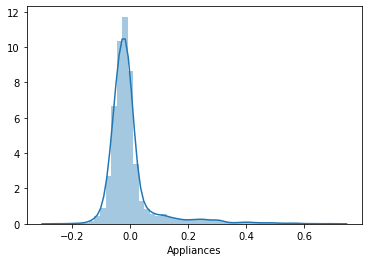

In [22]:
sns.distplot((y_test - predicted_values), bins=50)

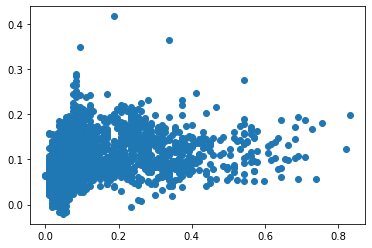

In [23]:
plt.scatter(y_test, predicted_values)

In [24]:
Cdf = pd.DataFrame(linear_model.coef_, model_dataframe.columns, columns=['Coeff'])

In [25]:
Cdf

,Coeff
temperature in kitchen,-3.281051e-03
humidity in kitchen,5.535571e-01
temperature in living room,-2.360947e-01
humidity in living room,-4.566081e-01
temperature in laundry room,2.905573e-01
humidity in laundry room,9.603237e-02
temperature in office room,2.895242e-02
humidity in office room,2.639414e-02
temperature in bathroom,-1.566390e-02
humidity in bathroom,1.599167e-02


## Mean Absolute Error

In [26]:
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test, predicted_values)
round(MeanAbsoluteError, 3)

0.05

## R-Squared

In [27]:
from sklearn.metrics import r2_score
RSquared_score = r2_score(y_test, predicted_values)
round(RSquared_score, 3)

0.149

## Residual Sum of Squares

In [28]:
RSS = np.sum(np.square(y_test - predicted_values))
round(RSS, 3)

45.345

## Root Mean Square Error

In [29]:
from sklearn.metrics import  mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predicted_values))
round(RMSE, 3)

0.088

## Feature Selection and LAsso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
Ridge_Reg = Ridge(alpha=0.4)
Ridge_Reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [39]:
from sklearn.metrics import  mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predicted_values))
round(RMSE, 3)

0.088

## Comparing the Regularisation Effects

In [32]:
def get_weights_df(model, feat, col_name):
    
  weights = pd.Series(model.coef_, feat.columns).sort_values()
    
  weights_df = pd.DataFrame(weights).reset_index()

  weights_df.columns = ['Features', col_name]
    
  weights_df[col_name].round(3)

  return weights_df

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
Ridge_weights_df = get_weights_df(Ridge_Reg, x_train, 'Ridge_Weight')
Lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

## Merging the Dataframes

In [34]:
final_weights = pd.merge(linear_model_weights, Ridge_weights_df, on='Features')


In [35]:
final_weights = pd.merge(final_weights, Lasso_weights_df, on='Features')

In [36]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Random variable 2,-1.577954e+11,0.000743,-0.000000
1,humidity in living room,-4.566081e-01,-0.401134,-0.000000
2,temperature outside (from Chievres weather sta...,-3.218156e-01,-0.250765,0.000000
3,temperature in living room,-2.360947e-01,-0.193880,0.000000
4,temperature in parents room,-1.898744e-01,-0.188584,-0.000000
5,humidity in teenager room 2,-1.575840e-01,-0.156596,-0.000110
6,humidity outside (from Chievres weather station),-7.770601e-02,-0.050541,-0.049557
7,humidity in ironing room,-4.463121e-02,-0.046291,-0.000000
8,humidity in parents room,-3.979309e-02,-0.041701,-0.000000
9,temperature in bathroom,-1.566390e-02,-0.020727,-0.000000
